In [15]:
import pandas as pd
import numpy as np
import graphviz
from sklearn import tree
from xgboost import XGBClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams

In [16]:
location = "/Users/chithrabhat/Desktop/SFU/Machine Learning/Project/USA_Dataset.csv"
usa_data = pd.read_csv(location)

In [17]:
df_predictor = usa_data['num']
unused_cols = ['num', 'id', 'ccf',  'lvx1', 'lvx2','lvx3','lvx4','lvf','cathef','junk','restckm','exerckm','thalsev','thalpul','dummy','smoke','earlobe','lmt','ladprox','laddist','diag','cxmain','ramus','om1','om2','rcaprox','rcadist','painloc','painexer','relrest','pncaden','restef','rldv5','restwm','exeref','exerwm','thalsev','thalpul','earlobe']
usa_data.drop(unused_cols, axis = 1,inplace = True)

In [18]:
data_processed = pd.get_dummies(usa_data, columns=['cp', 'restecg','slope','thal','loc'])

In [19]:
scaler = StandardScaler() 
scaler.fit_transform(data_processed)
condition = df_predictor == 0
data_processed['target'] = np.where(condition, 0 , 1)

In [20]:
data = data_processed.as_matrix()
train_x, test_x, train_y, test_y = train_test_split(data[:, 0:-1], data[:,-1],
                                                        train_size=0.7)

In [69]:
decision = DecisionTreeClassifier(min_samples_split= 20, max_leaf_nodes= 25, min_weight_fraction_leaf=0.35, max_depth =8, min_samples_leaf= 25)
decision_model = decision.fit(train_x,train_y)
boost = AdaBoostClassifier(n_estimators=100,base_estimator = decision, learning_rate=0.1)
boost_model = boost.fit(train_x,train_y)
gradient = GradientBoostingClassifier(learning_rate=0.1, n_estimators=90, max_depth=3, min_samples_leaf=4,subsample=0.9)
gradient_model = gradient.fit(train_x,train_y)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.09,max_depth=3,subsample=0.9)
xgb_model = xgb.fit(train_x,train_y)

In [66]:
print("Training Set Accuracy:", (decision.score(train_x,train_y))*100)
decision_predictions = decision_model.predict(test_x)
decision_accuracy = accuracy_score(test_y, decision_predictions)
print("Decision Tree Accuracy:" , decision_accuracy*100)

('Training Set Accuracy:', 72.700296735905042)
('Decision Tree Accuracy:', 71.034482758620683)


In [67]:
print("Training Set Accuracy:", (boost.score(train_x,train_y))*100)
boost_predictions = boost_model.predict(test_x)
boost_accuracy = accuracy_score(test_y, boost_predictions)
print("Adaptive Boosting Classifier Accuracy:" , boost_accuracy*100)

('Training Set Accuracy:', 78.63501483679525)
('Adaptive Boosting Classifier Accuracy:', 72.41379310344827)


In [68]:
print("Training Set Accuracy:", (gradient.score(train_x,train_y))*100)
gradient_predictions = gradient_model.predict(test_x)
gradient_accuracy = accuracy_score(test_y, gradient_predictions)
print("Gradient Tree Boosting Classifier Accuracy:" , gradient_accuracy*100)

('Training Set Accuracy:', 99.406528189910986)
('Gradient Tree Boosting Classifier Accuracy:', 79.310344827586206)


In [25]:
print("Training Set Accuracy:", (xgb.score(train_x,train_y))*100)
xgb_predictions = xgb_model.predict(test_x)
xgb_accuracy = accuracy_score(test_y, xgb_predictions)
print("Extreme Boosting Classifier Accuracy:" , gradient_accuracy*100)

('Training Set Accuracy:', 96.439169139465875)
('Extreme Boosting Classifier Accuracy:', 81.379310344827587)


In [26]:
vote = VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                                     ('Naive Bayes', BernoulliNB()),
                                    ('DecisionTree', DecisionTreeClassifier(min_samples_split= 20, max_leaf_nodes= 25, min_weight_fraction_leaf=0.35, max_depth =8, min_samples_leaf= 25)),
                                    ('SVM', SVC(kernel='linear', C=5))
                                    ], voting='hard')
vote_model = vote.fit(train_x,train_y)

In [27]:
print("Training Set Accuracy:", (vote.score(train_x,train_y))*100)
vote_predictions = vote_model.predict(test_x)
vote_accuracy = accuracy_score(test_y, vote_predictions)
print("Voting Classifier Accuracy:" , vote_accuracy*100)

('Training Set Accuracy:', 84.866468842729972)
('Voting Classifier Accuracy:', 78.620689655172413)


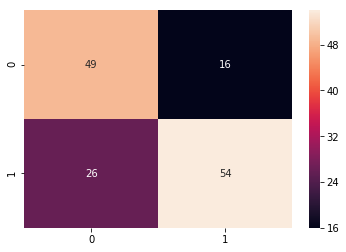

In [28]:
decision_cm = pd.DataFrame(confusion_matrix(test_y, decision_predictions), columns = [0 ,1], index = [0,1])
sns.heatmap(decision_cm, annot=True)
plt.show()

In [29]:
TP = decision_cm[1][1]
TN = decision_cm[0][0]
FP = decision_cm[0][1]
FN = decision_cm[1][0]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)

('Sensitivity : ', 0.77142857142857146)
('Specificity : ', 0.65333333333333332)


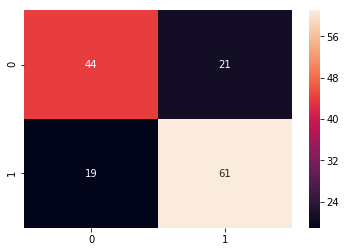

In [30]:
boost_cm = pd.DataFrame(confusion_matrix(test_y, boost_predictions), columns = [0 ,1], index = [0,1])
sns.heatmap(boost_cm, annot=True)
plt.show()

In [31]:
TP = boost_cm[1][1]
TN = boost_cm[0][0]
FP = boost_cm[0][1]
FN = boost_cm[1][0]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)

('Sensitivity : ', 0.74390243902439024)
('Specificity : ', 0.69841269841269837)


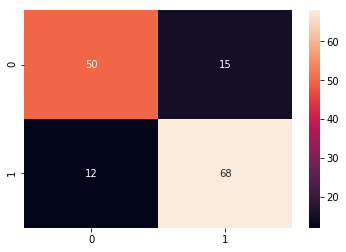

In [32]:
gradient_cm = pd.DataFrame(confusion_matrix(test_y, gradient_predictions), columns = [0 ,1], index = [0,1])
sns.heatmap(gradient_cm, annot=True)
plt.show()

In [33]:
TP = gradient_cm[1][1]
TN = gradient_cm[0][0]
FP = gradient_cm[0][1]
FN = gradient_cm[1][0]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)

('Sensitivity : ', 0.81927710843373491)
('Specificity : ', 0.80645161290322576)


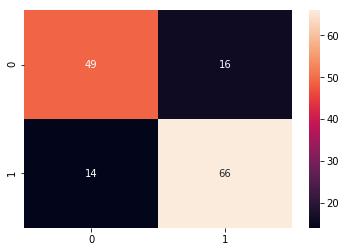

In [34]:
xgb_cm = pd.DataFrame(confusion_matrix(test_y, xgb_predictions), columns = [0 ,1], index = [0,1])
sns.heatmap(xgb_cm, annot=True)
plt.show()

In [35]:
TP = xgb_cm[1][1]
TN = xgb_cm[0][0]
FP = xgb_cm[0][1]
FN = xgb_cm[1][0]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)

('Sensitivity : ', 0.80487804878048785)
('Specificity : ', 0.77777777777777779)


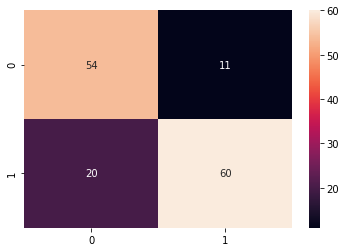

In [36]:
vote_cm = pd.DataFrame(confusion_matrix(test_y, vote_predictions), columns = [0 ,1], index = [0,1])
sns.heatmap(vote_cm, annot=True)
plt.show()

In [37]:
TP = vote_cm[1][1]
TN = vote_cm[0][0]
FP = vote_cm[0][1]
FN = vote_cm[1][0]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)
print("Sensitivity : ",sensitivity)
print("Specificity : ",specificity)

('Sensitivity : ', 0.84507042253521125)
('Specificity : ', 0.72972972972972971)


In [38]:
decision_cr = classification_report(test_y, decision_predictions)
print(decision_cr)

             precision    recall  f1-score   support

        0.0       0.65      0.75      0.70        65
        1.0       0.77      0.68      0.72        80

avg / total       0.72      0.71      0.71       145



In [39]:
adaptive_cr = classification_report(test_y, boost_predictions)
print(adaptive_cr)

             precision    recall  f1-score   support

        0.0       0.70      0.68      0.69        65
        1.0       0.74      0.76      0.75        80

avg / total       0.72      0.72      0.72       145



In [40]:
gradient_cr = classification_report(test_y, gradient_predictions)
print(gradient_cr)

             precision    recall  f1-score   support

        0.0       0.81      0.77      0.79        65
        1.0       0.82      0.85      0.83        80

avg / total       0.81      0.81      0.81       145



In [41]:
xgb_cr = classification_report(test_y, xgb_predictions)
print(xgb_cr)

             precision    recall  f1-score   support

        0.0       0.78      0.75      0.77        65
        1.0       0.80      0.82      0.81        80

avg / total       0.79      0.79      0.79       145



In [42]:
vote_cr = classification_report(test_y, vote_predictions)
print(vote_cr)

             precision    recall  f1-score   support

        0.0       0.73      0.83      0.78        65
        1.0       0.85      0.75      0.79        80

avg / total       0.79      0.79      0.79       145



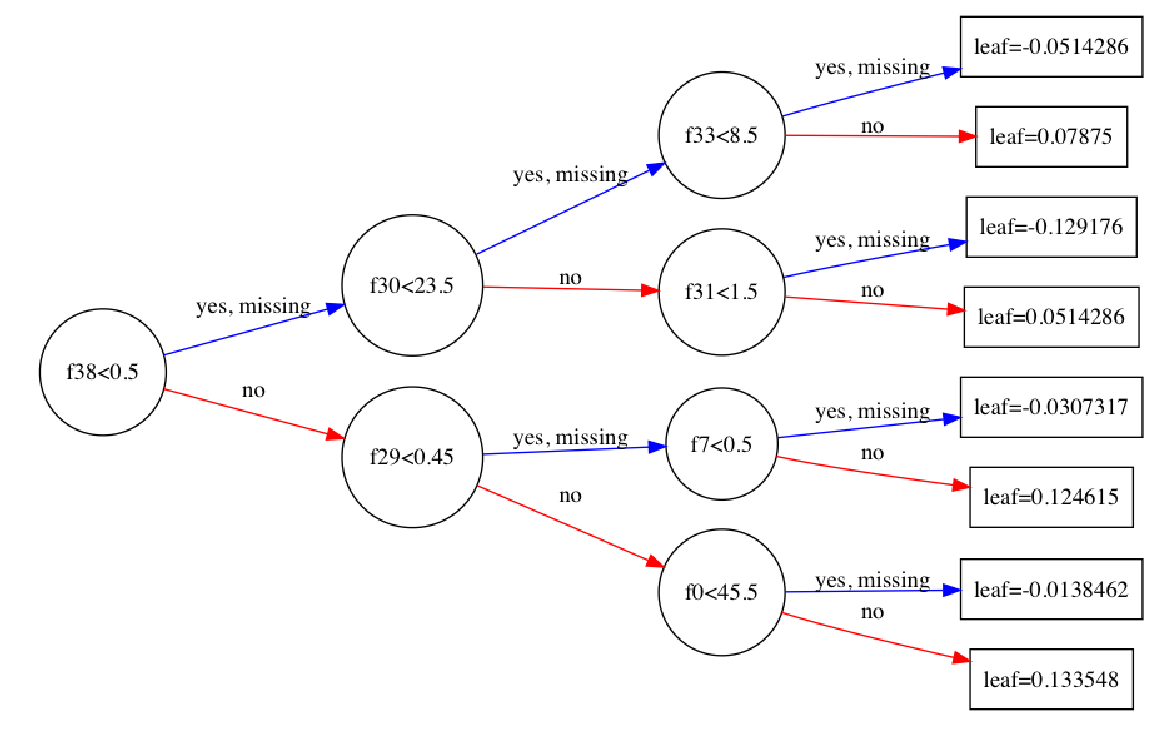

In [43]:
#Plot tree for Extra Gradient Boosting
plt.suptitle("Extra Gradient Boosting Algorithm")
rcParams['figure.figsize'] = 20, 18
plot_tree(xgb_model, rankdir='LR')
plt.show()

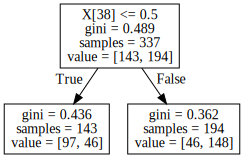

In [44]:
#Plot tree for Decision Tree
decision_tree = tree.export_graphviz(decision_model, out_file=None)
decision_graph = graphviz.Source(decision_tree)
decision_graph

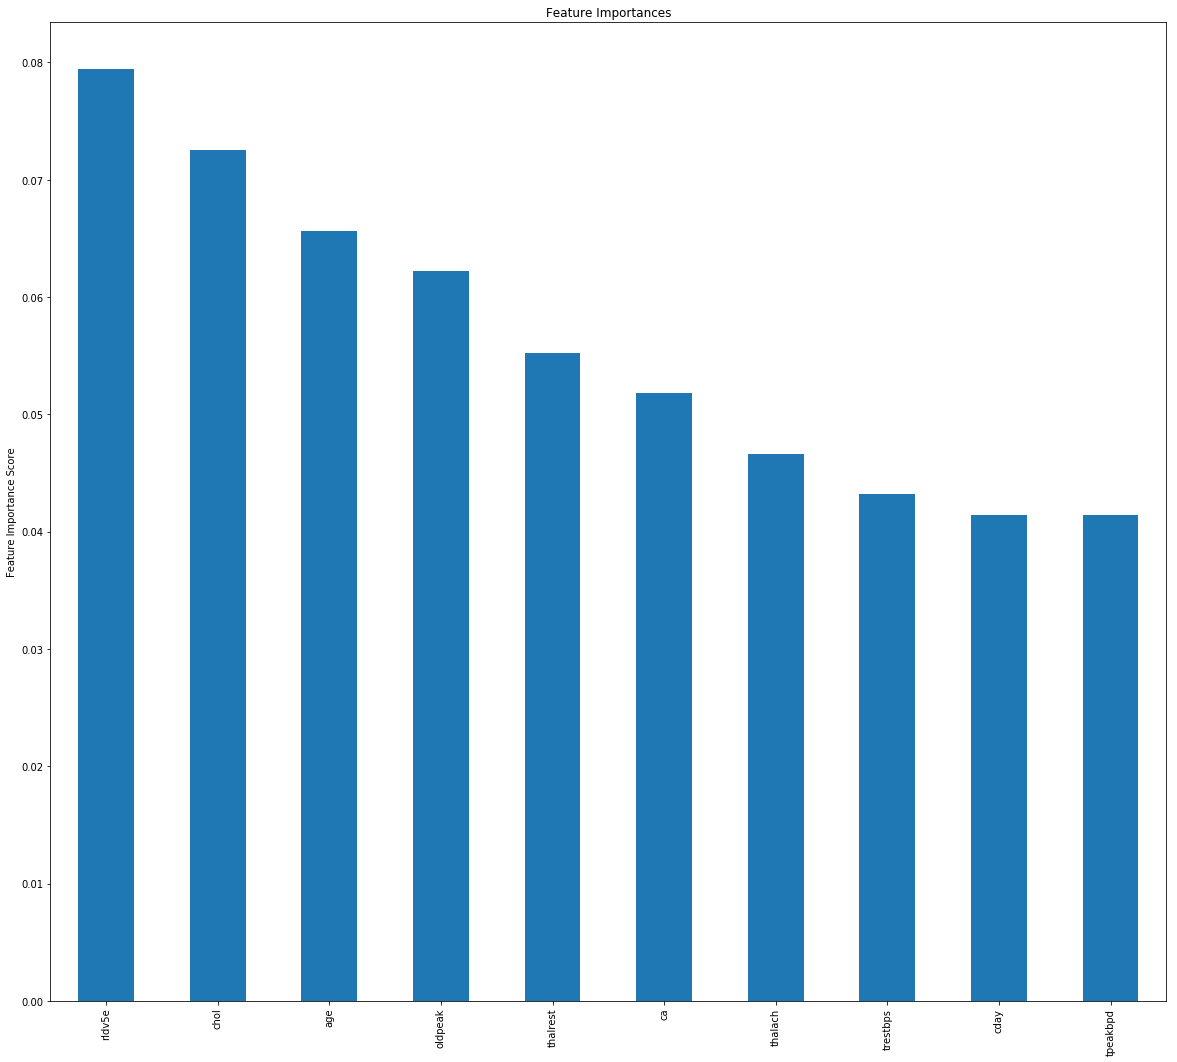

In [45]:
predictors = [x for x in data_processed.columns if x not in ['target']]
feat_imp = pd.Series(xgb_model.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp.nlargest(10)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [62]:
predictors = [x for x in data_processed.columns if x not in ['target', 'id']]
param_test1 = {'n_estimators':range(20,200,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt',subsample=0.9), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch1.fit(train_x,train_y)
gsearch1.best_params_

{'n_estimators': 90}

In [64]:
param_test2 = {'min_samples_leaf': range(1,8,1)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt',subsample=0.9), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=10)
gsearch2.fit(train_x,train_y)
gsearch2.best_params_

{'min_samples_leaf': 4}